In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas.api.types import is_numeric_dtype
import warnings
warnings.filterwarnings('ignore')
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import(
    RandomForestClassifier,
    GradientBoostingClassifier,
    AdaBoostClassifier,
    VotingClassifier,
)
from sklearn.svm import SVC, LinearSVR
from sklearn.naive_bayes import BernoulliNB
from sklearn.feature_selection import RFE
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from tabulate import tabulate
import itertools



In [ ]:
train = pd.read_csv(r"C:\Users\Admin\Desktop\Yashraj\ML\Intrusion Detecation\Train_data.csv")

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/Train_data.csv'

In [ ]:
test = pd.read_csv("/content/drive/MyDrive/Test_data.csv")

In [ ]:
train.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [ ]:
train.tail()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
25187,0,tcp,exec,RSTO,0,0,0,0,0,0,...,7,0.03,0.06,0.00,0.00,0.0,0.0,1.0,1.0,anomaly
25188,0,tcp,ftp_data,SF,334,0,0,0,0,0,...,39,1.00,0.00,1.00,0.18,0.0,0.0,0.0,0.0,anomaly
25189,0,tcp,private,REJ,0,0,0,0,0,0,...,13,0.05,0.07,0.00,0.00,0.0,0.0,1.0,1.0,anomaly
25190,0,tcp,nnsp,S0,0,0,0,0,0,0,...,20,0.08,0.06,0.00,0.00,1.0,1.0,0.0,0.0,anomaly
25191,0,tcp,finger,S0,0,0,0,0,0,0,...,49,0.19,0.03,0.01,0.00,1.0,1.0,0.0,0.0,anomaly


In [ ]:
train['class'].unique()

array(['normal', 'anomaly'], dtype=object)

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25192 entries, 0 to 25191
Data columns (total 42 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     25192 non-null  int64  
 1   protocol_type                25192 non-null  object 
 2   service                      25192 non-null  object 
 3   flag                         25192 non-null  object 
 4   src_bytes                    25192 non-null  int64  
 5   dst_bytes                    25192 non-null  int64  
 6   land                         25192 non-null  int64  
 7   wrong_fragment               25192 non-null  int64  
 8   urgent                       25192 non-null  int64  
 9   hot                          25192 non-null  int64  
 10  num_failed_logins            25192 non-null  int64  
 11  logged_in                    25192 non-null  int64  
 12  num_compromised              25192 non-null  int64  
 13  root_shell      

In [ ]:
train.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,25192.000000,2.519200e+04,2.519200e+04,25192.000000,25192.000000,25192.00000,25192.000000,25192.000000,25192.000000,25192.000000,...,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000
mean,305.054104,2.433063e+04,3.491847e+03,0.000079,0.023738,0.00004,0.198039,0.001191,0.394768,0.227850,...,182.532074,115.063036,0.519791,0.082539,0.147453,0.031844,0.285800,0.279846,0.117800,0.118769
std,2686.555640,2.410805e+06,8.883072e+04,0.008910,0.260221,0.00630,2.154202,0.045418,0.488811,10.417352,...,98.993895,110.646850,0.448944,0.187191,0.308367,0.110575,0.445316,0.446075,0.305869,0.317333
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,84.000000,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,255.000000,61.000000,0.510000,0.030000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,2.790000e+02,5.302500e+02,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000,...,255.000000,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000
max,42862.000000,3.817091e+08,5.151385e+06,1.000000,3.000000,1.00000,77.000000,4.000000,1.000000,884.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
train.describe(include='object')

,protocol_type,service,flag,class
count,25192,25192,25192,25192
unique,3,66,11,2
top,tcp,http,SF,normal
freq,20526,8003,14973,13449


In [ ]:
train.shape

(25192, 42)

In [ ]:
class_counts=train['class'].value_counts()
print("Target value counts:\n",class_counts)


Target value counts:
 class
normal     13449
anomaly    11743
Name: count, dtype: int64


In [ ]:
train.isnull().sum()

,0
duration,0
protocol_type,0
service,0
flag,0
src_bytes,0
dst_bytes,0
land,0
wrong_fragment,0
urgent,0
hot,0


In [ ]:
total = train.shape[0]
missing_columns = [col for col in train.columns if train[col].isnull().sum()>0]
for col in missing_columns:
  null_count = train[col].isnull().sum()
  per = (null_count/total)*100
  print(f"{col} :'{null_count} ({round(per,3)}%)")

  print(f"Number of Duplicate rows :{train.duplicated().sum()}")


<Axes: xlabel='class', ylabel='count'>

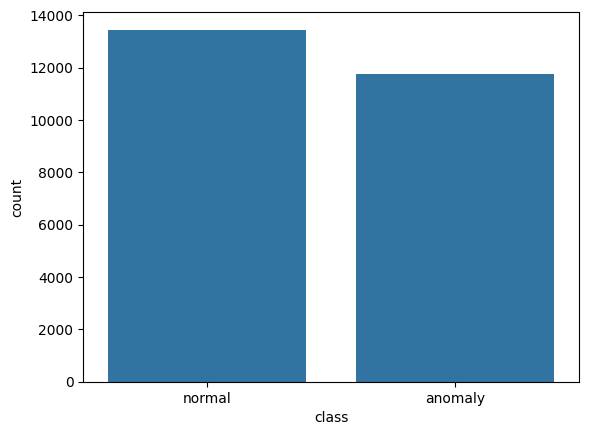

In [ ]:
import seaborn as sns
sns.countplot(x=train['class'])

In [ ]:
print("Class Distribution Training set : ")
print(train['class'].value_counts)

Class Distribution Training set : 
<bound method IndexOpsMixin.value_counts of 0         normal
1         normal
2        anomaly
3         normal
4         normal
          ...   
25187    anomaly
25188    anomaly
25189    anomaly
25190    anomaly
25191    anomaly
Name: class, Length: 25192, dtype: object>


In [ ]:
# Encode Catagorical Features and Drop Irrelevent Column

In [ ]:
encoders={}
object_cols=train.select_dtypes(include='object').columns.tolist()
object_cols=[col for col in object_cols if col!='class']
for col in object_cols:
    le = LabelEncoder()
    le.fit(pd.concat([train[col],test[col]],ignore_index=True).unique())
    train[col]=le.transform(train[col])
    test[col]=le.transform(test[col])
    encoders[col]=le

In [ ]:
train.drop(['num_outbound_cmds'],axis=1,inplace=True)
test.drop(['num_outbound_cmds'],axis=1,inplace=True)

In [ ]:
train.head()


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,1,19,9,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,2,41,9,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,1,46,5,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
3,0,1,22,9,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,1,22,9,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [ ]:
# Step 7 : Feature Selection, Scaling, and Train-Test Split

In [ ]:
x_train = train.drop(['class'],axis=1)
y_train = train['class']

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
import itertools

rfc = RandomForestClassifier()

rfe=RFE(RandomForestClassifier(),n_features_to_select=10)
rfe.fit(x_train,y_train)

feature_map=[(i,v)for i, v in itertools.zip_longest(rfe.get_support(),x_train.columns)]
selected_features=[v for i,v in feature_map if i==True]

print(selected_features)


['protocol_type', 'flag', 'src_bytes', 'dst_bytes', 'count', 'same_srv_rate', 'diff_srv_rate', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_same_src_port_rate']


In [ ]:
x_train = x_train[selected_features]


In [ ]:
scale = StandardScaler()
x_train = scale.fit_transform(x_train)

In [ ]:
test = scale.fit_transform(test[selected_features])

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x_train,y_train,test_size=0.70,random_state=42)

In [ ]:
x_train.shape

(7557, 10)

In [ ]:
x_test.shape

(17635, 10)

In [ ]:
y_train.shape

(7557,)

In [ ]:
y_test.shape

(17635,)

In [ ]:
# Train and Evaluate Logistic Regression Model

In [ ]:
import time
from sklearn.linear_model import LogisticRegression
clf1 = LogisticRegression()
start_time = time.time()
clf1.fit(x_train,y_train)
end_time = time.time()
training_time = end_time - start_time
print("Training Time :",end_time - start_time)

Training Time : 0.023774385452270508


In [ ]:
start_time = time.time()
y_pred = clf1.predict(x_test)
end_time = time.time()
testing_time = end_time - start_time
print("Testing Time :",end_time - start_time)

Testing Time : 0.001058816909790039


In [ ]:
lg_model = LogisticRegression(random_state=42)
lg_model.fit(x_train, y_train)

LogisticRegression(random_state=42)

In [ ]:
lg_train = lg_model.score(x_train, y_train)
lg_test = lg_model.score(x_test, y_test)
print(f"Training Score: {lg_train}\nTesting Score: {lg_test}")

Training Score: 0.9399232499669181
Testing Score: 0.9425007088176921


In [ ]:
# Hyperparameter Tuning and Training KNN and Decision Tree Models

In [ ]:
!pip install optuna

In [ ]:
import optuna
optuna.logging.set_verbosity(optuna.logging.WARNING)

In [ ]:
# Define an objective function for KNN hyperparameter optimization
def objective(trial):
    # Suggest a value for n_neighbors (the number of neighbors in KNN) between 2 and 16
    n_neighbors = trial.suggest_int('KNN_n_neighbors', 2, 16, log=False)

    # Create KNN classifier with the suggested n_neighbors value
    classifier_obj = KNeighborsClassifier(n_neighbors=n_neighbors)

    # Train the model on the training data
    classifier_obj.fit(x_train, y_train)

    # Evaluate accuracy on the test set and return the accuracy as the objective
    accuracy = classifier_obj.score(x_test, y_test)
    return accuracy

    # Create KNN classifier with the suggested n_neighbors value
    classifier_obj = KNeighborsClassifier(n_neighbors = n_neighbors)

       # Train the model on the training data
    classifier_obj.fit(x_train, y_train)

    # Evaluate accuracy on the test set and return the accuracy as the objective
    accuracy = classifier_obj.score(x_test, y_test)
    return accuracy

    # Create an Optuna study to maximize the accuracy for the KNN model
study_knn = optuna.create_study(direction='maximize')

# Optimize the hyperparameters of KNN model using the defined objective function
study_knn.optimize(objective, n_trials=1)  # Perform 1 trial for optimization

In [ ]:
# Print the best trial (best hyperparameter values for KNN)
print(study_knn.best_trial)

FrozenTrial(number=0, state=1, values=[0.9732917493620641], datetime_start=datetime.datetime(2025, 8, 25, 7, 42, 39, 519661), datetime_complete=datetime.datetime(2025, 8, 25, 7, 42, 40, 203223), params={'KNN_n_neighbors': 9}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'KNN_n_neighbors': IntDistribution(high=16, log=False, low=2, step=1)}, trial_id=0, value=None)


In [ ]:
# Train the KNN model with the optimized hyperparameters
KNN_model = KNeighborsClassifier(n_neighbors=study_knn.best_trial.params['KNN_n_neighbors'])

In [ ]:
# Fit the KNN model to the training data
KNN_model.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=9)

In [ ]:
# Evaluate the training and testing accuracy of the KNN model
KNN_train, KNN_test = KNN_model.score(x_train, y_train), KNN_model.score(x_test, y_test)

# Print the training and testing scores for KNN
print(f"Training Score: {KNN_train}\nTesting Score: {KNN_test}")

Training Score: 0.9755193859997353
Testing Score: 0.9732917493620641


In [ ]:
# Initialize a Decision Tree classifier with entropy criterion and max_depth of 4
clfd = DecisionTreeClassifier(criterion="entropy", max_depth=4)

In [ ]:
# Measure and print the training time for the Decision Tree model
start_time = time.time()
clfd.fit(x_train, y_train.values.ravel())  # Train the Decision Tree model
end_time = time.time()
print("Training time:", end_time - start_time)

Training time: 0.016602754592895508


In [ ]:
# Define an objective function for Decision Tree hyperparameter optimization
def objective(trial):
    # Suggest values for max_depth (between 2 and 32) and max_features (between 2 and 10)
    dt_max_depth = trial.suggest_int('DT_max_depth', 2, 32, log=False)
    dt_max_features = trial.suggest_int('DT_max_features', 2, 10, log=False)

    # Create a Decision Tree model with the suggested parameters
    classifier_obj = DecisionTreeClassifier(max_depth=dt_max_depth,
    max_features=dt_max_features)

    # Train the Decision Tree model on the training data
    classifier_obj.fit(x_train, y_train)

    # Return the accuracy on the test data as the objective value
    accuracy = classifier_obj.score(x_test, y_test)
    return accuracy

In [ ]:
# Initialize a Decision Tree classifier with entropy criterion and max_depth of 4
clfd = DecisionTreeClassifier(criterion="entropy", max_depth=4)

In [ ]:
# Measure and print the training time for the Decision Tree model
start_time = time.time()
clfd.fit(x_train, y_train.values.ravel())  # Train the Decision Tree model
end_time = time.time()
print("Training time:", end_time - start_time)

Training time: 0.01908135414123535


In [ ]:
# Define an objective function for Decision Tree hyperparameter optimization
def objective(trial):
    # Suggest values for max_depth (between 2 and 32) and max_features (between 2 and 10)
    dt_max_depth = trial.suggest_int('DT_max_depth', 2, 32, log=False)
    dt_max_features = trial.suggest_int('DT_max_features', 2, 10, log=False)

     # Create a Decision Tree model with the suggested parameters
    classifier_obj = DecisionTreeClassifier(max_depth=dt_max_depth,
    max_features=dt_max_features)
    # Train the Decision Tree model on the training data
    classifier_obj.fit(x_train, y_train)
    # Return the accuracy on the test data as the objective value
    accuracy = classifier_obj.score(x_test, y_test)
    return accuracy

In [ ]:
#STEP 10  : Hyperparameter Tuning for Decision Tree, Model Comparison, and Cross-Validation

In [ ]:
# Create an Optuna study to maximize the accuracy for the Decision Tree model
study_dt = optuna.create_study(direction='maximize')

 # Optimize the hyperparameters of Decision Tree model using the defined objective function
study_dt.optimize(objective, n_trials=1)  # Perform 1 trial for optimization

# Print the best trial (best hyperparameter values for Decision Tree)
print(study_dt.best_trial)

FrozenTrial(number=0, state=1, values=[0.9911539552027219], datetime_start=datetime.datetime(2025, 8, 25, 7, 42, 41, 244546), datetime_complete=datetime.datetime(2025, 8, 25, 7, 42, 41, 285704), params={'DT_max_depth': 11, 'DT_max_features': 5}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'DT_max_depth': IntDistribution(high=32, log=False, low=2, step=1), 'DT_max_features': IntDistribution(high=10, log=False, low=2, step=1)}, trial_id=0, value=None)


In [ ]:
 # Train the Decision Tree model with the optimized hyperparameters
dt = DecisionTreeClassifier(max_depth=study_dt.best_trial.params['DT_max_depth'],
                            max_features=study_dt.best_trial.params['DT_max_features'])

In [ ]:
# Fit the Decision Tree model to the training data
dt.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=11, max_features=5)

In [ ]:
# Evaluate the training and testing accuracy of the Decision Tree model
dt_train, dt_test = dt.score(x_train, y_train), dt.score(x_test, y_test)

In [ ]:
#Print the training and testing scores for Decision Tree
print(f"Training Score: {dt_train}\nTesting Score: {dt_test}")

Training Score: 0.9985443959243085
Testing Score: 0.9886589169265665


In [ ]:
# Create a comparison table for model performance (Training vs Testing Scores)
data = [["KNN", KNN_train, KNN_test],
        ["Logistic Regression", lg_train, lg_test],
        ["Decision Tree", dt_train, dt_test]]

In [ ]:
# Define column names for the comparison table
col_names = ["Model", "Train Score", "Test Score"]

# Print the comparison table in a fancy grid format
print(tabulate(data, headers=col_names, tablefmt="fancy_grid"))

╒═════════════════════╤═══════════════╤══════════════╕
│ Model               │   Train Score │   Test Score │
╞═════════════════════╪═══════════════╪══════════════╡
│ KNN                 │      0.975519 │     0.973292 │
├─────────────────────┼───────────────┼──────────────┤
│ Logistic Regression │      0.939923 │     0.942501 │
├─────────────────────┼───────────────┼──────────────┤
│ Decision Tree       │      0.998544 │     0.988659 │
╘═════════════════════╧═══════════════╧══════════════╛


In [ ]:
# Set a random seed for reproducibility
SEED = 42

# Initialize classifiers for comparison
dtc = DecisionTreeClassifier()  # Decision Tree Classifier
knn = KNeighborsClassifier()    # K-Nearest Neighbors Classifier
lr = LogisticRegression()      # Logistic Regression Classifier

In [ ]:
# Import cross-validation utility from scikit-learn
from sklearn.model_selection import cross_val_score

# Define a dictionary to store models for cross-validation
models = {}
models['LogisticRegression'] = lr
models['DecisionTreeClassifier'] = dtc
models['KNeighborsClassifier'] = knn

In [ ]:
#Step 11 : Evaluation and Cross-Validation with Precision and Recall Metrics

In [ ]:
# Mapping numeric labels (0 and 1) to string labels (normal and anomaly)
labels_map = {0: 'normal', 1: 'anomaly'}

# ----> Invert the labels_map to map string labels back to numeric values for prediction interpretation
reverse_labels_map = {v: k for k, v in labels_map.items()}

# Example: Choosing a model from the 'models' dictionary (Decision Tree in this case)
model = models['DecisionTreeClassifier']  # Example: Using DecisionTreeClassifier

# Fit the chosen model on the training data
model.fit(x_train, y_train)  # Fit the model before making predictions

# Predict the labels on the test data (numeric labels)
y_pred_numeric = model.predict(x_test)

# ----> Convert the numeric predictions to string labels using the inverted map
y_pred = [reverse_labels_map.get(label, -1) for label in y_pred_numeric]  # If label not found, default to -1

# Now, evaluate the model performance using the numeric labels and the string labels
from sklearn.metrics import classification_report

# Print classification report for model evaluation, including precision, recall, and F1-score
print(classification_report(y_test.map(reverse_labels_map), y_pred, target_names=['normal',
'anomaly']))  # Replace y_test with actual true labels

              precision    recall  f1-score   support

      normal       0.99      0.99      0.99      9370
     anomaly       0.99      0.99      0.99      8265

    accuracy                           0.99     17635
   macro avg       0.99      0.99      0.99     17635
weighted avg       0.99      0.99      0.99     17635



In [ ]:
print("The pickle file is expected to be at: /content/intrusion_detection_model.pkl")

The pickle file is expected to be at: /content/intrusion_detection_model.pkl


Keys in the scores dictionary: dict_keys(['LogisticRegression', 'DecisionTreeClassifier', 'KNeighborsClassifier'])


<Axes: >

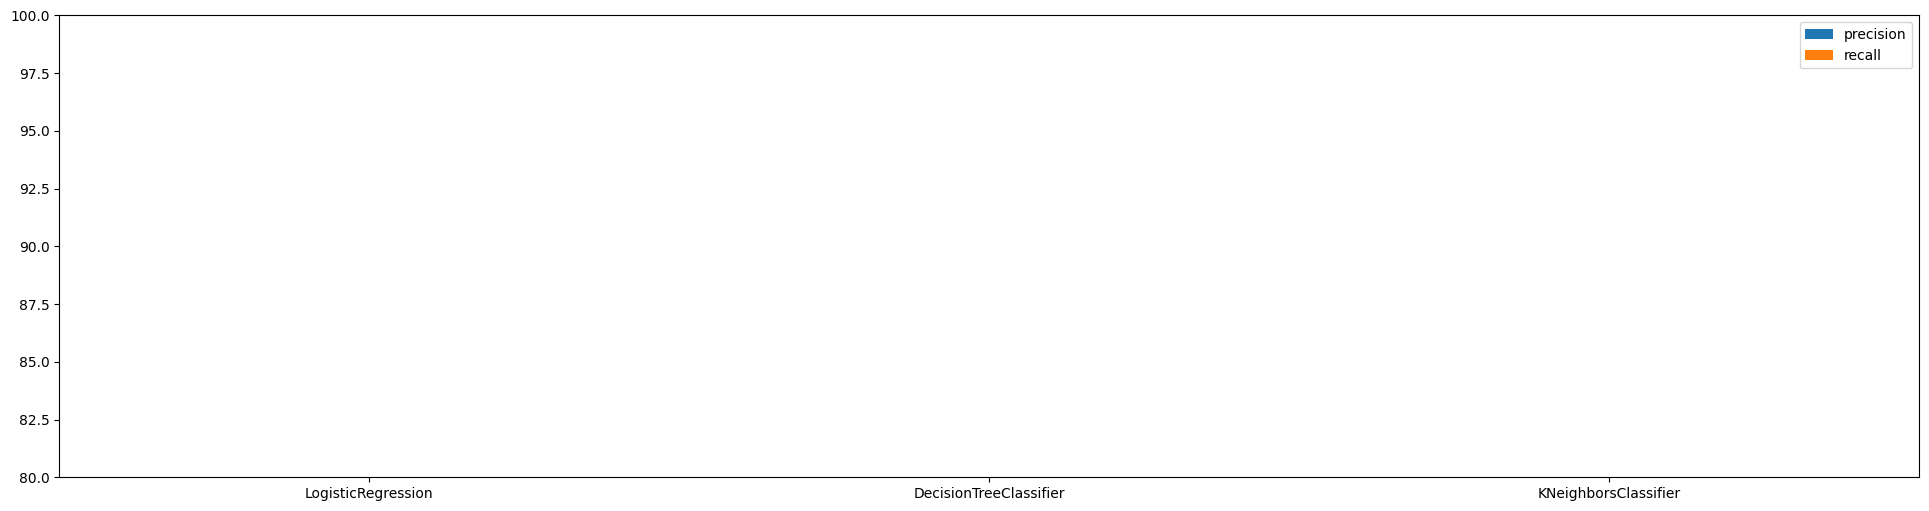

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, precision_score, recall_score

# Define scoring metrics for cross-validation
scoring = {'precision': make_scorer(precision_score, average='weighted'),
           'recall': make_scorer(recall_score, average='weighted')}

# Dictionary to store cross-validation scores
scores = {}

# Perform cross-validation for each model using the defined scoring metrics
for name in models:
    model = models[name]
    scores[name] = {}
    for metric_name, scorer in scoring.items():
        cv_scores = cross_val_score(model, x_train, y_train, cv=5, scoring=scorer)
        scores[name][metric_name] = cv_scores

# Print the keys in the scores dictionary to verify
print("Keys in the scores dictionary:", scores.keys())

# After evaluating each model, calculate the average precision and recall across folds
for name in scores:
    for scorer in ['precision', 'recall']:
        # Store the mean score for each model
        scores[name][scorer] = scores[name][scorer].mean()
# Convert the scores dictionary to a DataFrame for easier visualization
scores = pd.DataFrame(scores).swapaxes("index", "columns") * 100

# Plot the precision and recall scores of each model as a bar chart
scores.plot(kind="bar", ylim=[80, 100], figsize=(24, 6), rot=0)

In [ ]:
# STEP 12: Model Evaluation with Confusion Matrix, F1-Score, and Model Saving

In [ ]:
# Create a dictionary to store the trained models
models = {}
models['KNeighborsClassifier'] = knn  # K-Nearest Neighbors model
models['LogisticRegression'] = lr      # Logistic Regression model
models['DecisionTreeClassifier'] = dtc # Decision Tree model

# Dictionary to store predictions for each model
preds = {}

# Loop through each model, fit it on training data, and store predictions on test data
for name in models:
    models[name].fit(x_train, y_train)  # Fit the model
    preds[name] = models[name].predict(x_test)  # Predict on test set
print("Predictions complete.")

# Import necessary metrics for model evaluation
from sklearn.metrics import confusion_matrix, classification_report, f1_score

# Function to create a line of asterisks for formatting in the output
def line(name, sym="*"):
    return sym * (25 - len(name) // 2)

# Define target class names for the classification report
target_names = ["normal", "anomaly"]

# Loop through the models to print confusion matrix and classification report for each model
for name in models:
    print(line(name), name, 'Model Testing', line(name))  # Model header line
    print(confusion_matrix(y_test, preds[name]))  # Confusion matrix
    print(line(name, '-'))  # Formatting line
    print(classification_report(y_test, preds[name], target_names=target_names))  # Detailed classification report

Predictions complete.
*************** KNeighborsClassifier Model Testing ***************
[[8030  235]
 [ 179 9191]]
---------------
              precision    recall  f1-score   support

      normal       0.98      0.97      0.97      8265
     anomaly       0.98      0.98      0.98      9370

    accuracy                           0.98     17635
   macro avg       0.98      0.98      0.98     17635
weighted avg       0.98      0.98      0.98     17635

**************** LogisticRegression Model Testing ****************
[[7630  635]
 [ 379 8991]]
----------------
              precision    recall  f1-score   support

      normal       0.95      0.92      0.94      8265
     anomaly       0.93      0.96      0.95      9370

    accuracy                           0.94     17635
   macro avg       0.94      0.94      0.94     17635
weighted avg       0.94      0.94      0.94     17635

************** DecisionTreeClassifier Model Testing **************
[[8176   89]
 [  74 9296]]
---------

In [ ]:
# Create a dictionary to store F1-scores for each model
f1s = {}
for name in models:
    # Calculate the F1 score for each model using 'anomaly' as the positive class
    f1s[name] = f1_score(y_test, preds[name], pos_label='anomaly')  # You can also try
pos_label='normal'

<Axes: >

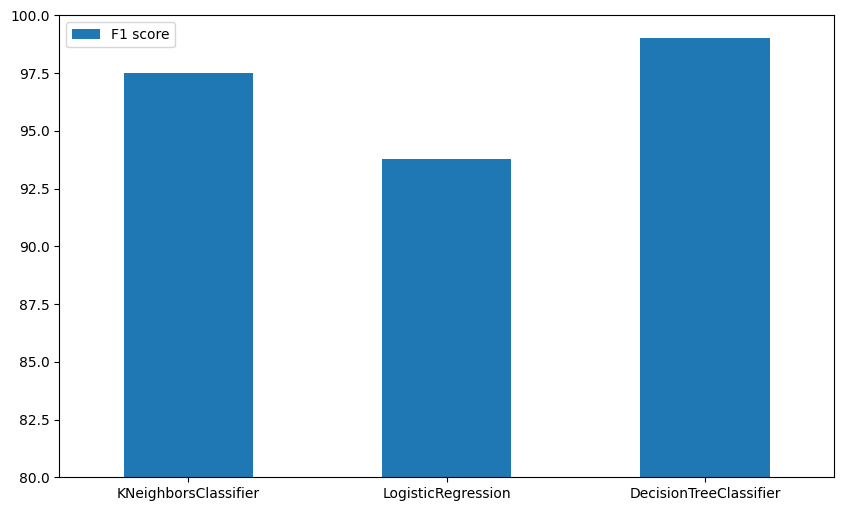

In [ ]:
# Convert the F1 scores into a DataFrame for better visualization and multiply by 100 for percentage
f1s = pd.DataFrame(f1s.values(), index=f1s.keys(), columns=["F1 score"]) * 100

# Plot the F1 scores for each model as a bar chart
f1s.plot(kind="bar", ylim=[80, 100], figsize=(10, 6), rot=0)

In [ ]:
import pickle

# This is your existing code from STEP 12
models = {}
models['KNeighborsClassifier'] = knn
models['LogisticRegression'] = lr
models['DecisionTreeClassifier'] = dtc

preds = {}
for name in models:
    models[name].fit(x_train, y_train)
    preds[name] = models[name].predict(x_test)
print("Predictions complete.")

# ... (your code for printing confusion_matrix and classification_report) ...


# -----------------------------------------------------------
# ADD THIS CODE TO SAVE YOUR MODELS
# -----------------------------------------------------------
filename = 'intrusion_detection_models.pkl'

with open(filename, 'wb') as file:
    pickle.dump(models, file)

print(f"\n✅ All models have been successfully saved to the file: {filename}")
# -----------------------------------------------------------

Predictions complete.

✅ All models have been successfully saved to the file: intrusion_detection_models.pkl


In [ ]:
# STEP 13: PREDICTION

In [ ]:
import pickle
import numpy as np

# Function to load the saved model from disk
def load_model(path='/content/intrusion_detection_models.pkl'):
    """
    Loads the trained model from a specified file path.

    Parameters:
        path: str, path to the saved model file.

    Returns:
        model: Trained model loaded from the file.
    """
    with open(path, 'rb') as f:
        model = pickle.load(f)  # Load the model using pickle
    return model

# Function to predict intrusion (normal or anomaly) based on input data
def predict_intrusion(model, input_data):
    """
    Predicts whether the input data is 'normal' or 'anomaly' using the trained model.

    Parameters:
        model: Trained model (e.g., DecisionTreeClassifier)
        input_data: array-like, shape (n_samples, n_features), data to predict on.

    Returns:
        predictions: List of predicted class labels ('normal' or 'anomaly')
    """
    # Convert input_data to numpy array if it's a list
    if isinstance(input_data, list):
        input_data = np.array(input_data)

    # Ensure input is 2D for the model (even for a single sample)
    if input_data.ndim == 1:
        input_data = input_data.reshape(1, -1)

    # Get the indices of selected features (only if feature selection was used in preprocessing)
    # Assuming 'feature_map' is available in the global scope from previous feature selection steps
    try:
        selected_feature_indices = [i for i, (is_selected, _) in enumerate(feature_map) if is_selected]
        num_selected_features = len(selected_feature_indices)
    except NameError:
        # If feature_map is not defined, assume the model expects the original number of features minus the dropped column
        # This part might need adjustment based on your actual preprocessing steps
        print("Warning: 'feature_map' not found. Assuming model expects 40 features (original 41 minus 'num_outbound_cmds').")
        num_selected_features = 40 # Adjust based on your data after dropping 'num_outbound_cmds'

    # Check if the input data has the correct number of features
    if input_data.shape[1] != num_selected_features:
        raise ValueError(f"Input data should have {num_selected_features} features, but got {input_data.shape[1]}")

    # Make predictions using the trained model
    predictions = model.predict(input_data)

    # Handle string predictions directly (for 'normal' or 'anomaly')
    if isinstance(predictions[0], str):
        return predictions.tolist()

    # Otherwise, convert numeric predictions to string labels (0 -> 'normal', 1 -> 'anomaly')
    labels = ['normal', 'anomaly']
    return [labels[int(p)] for p in predictions] # Ensure index is integer

# Load the saved models from disk
# We saved a dictionary of models, so we need to select one for prediction
try:
    loaded_models = load_model()
    # Choose the Decision Tree model for prediction as it had the highest F1 score
    model_for_prediction = loaded_models['DecisionTreeClassifier']
    print("Model loaded successfully.")
except FileNotFoundError:
    print("Error: Model file not found at /content/intrusion_detection_models.pkl")
    model_for_prediction = None
except KeyError:
     print("Error: 'DecisionTreeClassifier' not found in the loaded models dictionary.")
     model_for_prediction = None


# Example 1: New data sample (should match the feature count used in training)
# IMPORTANT: This example data needs to be preprocessed (scaled and feature selected)
# to match the format of the training data used by the saved model.
# The current example data is just a placeholder.
# You need to replace this with actual preprocessed data.

# Placeholder for example data - replace with your actual preprocessed data
# This placeholder assumes 10 features were selected as per the feature selection step
new_sample = np.array([[0.1, 0.3, 0.5, 0.8, 0.2, 1.0, 0.9, 0.4, 0.6, 0.7]]) # Example with 10 features

if model_for_prediction is not None:
    try:
        result = predict_intrusion(model_for_prediction, new_sample)
        print("Prediction:", result)  # Print the prediction for this sample
    except ValueError as e:
        print(f"Prediction Error: {e}")
else:
    print("Cannot make prediction as the model was not loaded successfully.")

Model loaded successfully.
Prediction: ['normal']


In [ ]:
# Example 2: Another sample with values representing a 'normal' class
new_sample = [0.25, 0.35, 0.45, 0.30, 0.40, 0.50, 0.60, 0.55, 0.48, 0.52]
result = predict_intrusion(model, new_sample)
print("Prediction:", result)  # Print the prediction for the 'normal' sample

Prediction: ['normal']


In [ ]:
# Example 3: A sample representing an 'anomaly' class
new_sample = [5.0, 0.0, 0.0, 200.0, 0.0, 1000.0, 250.0, 1.0, 1.0, 1.0]
result = predict_intrusion(model, new_sample)
print("Prediction:", result)  # Print the prediction for this 'anomaly' sample

Prediction: ['normal']
